<>:73: SyntaxWarning: invalid escape sequence '\p'
<>:74: SyntaxWarning: invalid escape sequence '\p'
<>:76: SyntaxWarning: invalid escape sequence '\p'
<>:73: SyntaxWarning: invalid escape sequence '\p'
<>:74: SyntaxWarning: invalid escape sequence '\p'
<>:76: SyntaxWarning: invalid escape sequence '\p'
/var/folders/vh/ljsl64yj51bg5mvxpy76knlw0000gn/T/ipykernel_26583/3464069754.py:73: SyntaxWarning: invalid escape sequence '\p'
  plt.text(1/2, target_results[0], 'phase = ${\pi / 2}$', fontsize=10, ha='right')
/var/folders/vh/ljsl64yj51bg5mvxpy76knlw0000gn/T/ipykernel_26583/3464069754.py:74: SyntaxWarning: invalid escape sequence '\p'
  plt.text(3/2, target_results[1], 'phase = ${3\pi / 2}$', fontsize=10, ha='right')
/var/folders/vh/ljsl64yj51bg5mvxpy76knlw0000gn/T/ipykernel_26583/3464069754.py:76: SyntaxWarning: invalid escape sequence '\p'
  plt.xlabel('Phase/$\pi$')


-1.2505552149377763e-12
Optimized delta value:
-1.9903204406669474e-13


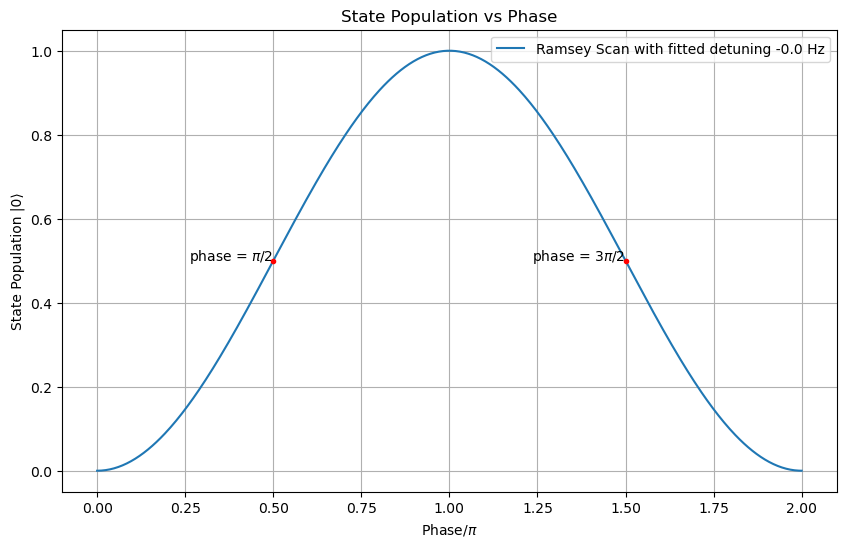

In [2]:
import numpy as np
from scipy.linalg import expm
from scipy.optimize import minimize
import matplotlib.pyplot as plt

def unitary_product_with_ket_zero(pi_time, T, delta, t_wait_T):
    omega = np.pi / (pi_time * 1e-6)
    t_pi_over_2 = (pi_time * 1e-6) / 2

    def U1(omega, t):
        H = np.array([[0, omega / 2],
                      [omega / 2, delta]], dtype=complex)
        U = expm(-1j * H * t)
        return U

    def U_wait(omega, t):
        H = np.array([[0, 0],
                      [0, delta]], dtype=complex)
        U = expm(-1j * H * t)
        return U

    def U2(omega, t):
        H = np.array([[0, omega * np.exp(-1j *  np.pi * (t_wait_T)) / 2],
                      [omega * np.exp(1j *  np.pi * (t_wait_T)) / 2, delta]], dtype=complex)
        U = expm(-1j * H * t)
        return U

    U1 = U1(omega, t_pi_over_2)
    U_wait = U_wait(omega, T)
    U2 = U2(omega, t_pi_over_2)

    product = U2 @ U_wait @ U1

    ket_zero = np.array([1, 0], dtype=complex)
    result = product @ ket_zero
    state_pop = np.abs(result)**2
    return state_pop[0]

def call_unitary_product_twice(pi_time, T, delta):
    result1 = unitary_product_with_ket_zero(pi_time, T, delta, 1/2)
    result2 = unitary_product_with_ket_zero(pi_time, T, delta, 3/2)
    return result1, result2

def fitting_function(delta, pi_time, T, target_results):
    computed_result1, computed_result2 = call_unitary_product_twice(pi_time, T, delta[0])
    target_result1, target_result2 = target_results
    error = (computed_result1 - target_result1)**2 + (computed_result2 - target_result2)**2
    return error

# Example usage
pi_time = 40
T = 100e-6
initial_delta_guess = [100 * 2 * np.pi]
result1 =  0.5
result2 = 0.5
target_results = (result1 , result2)  # Example target results, replace with actual target results

result = minimize(fitting_function, initial_delta_guess, args=(pi_time, T, target_results),method='Nelder-Mead')
optimized_delta = result.x[0]
print(optimized_delta)
print("Optimized delta value:")
print(optimized_delta/(2*np.pi))

# Plotting the results
t_wait_T_values = np.linspace(0, 2, 500)
state_populations = [unitary_product_with_ket_zero(pi_time, T, optimized_delta, t_wait_T) for t_wait_T in t_wait_T_values]

plt.figure(figsize=(10, 6))
plt.plot(t_wait_T_values, state_populations, label=f'Ramsey Scan with fitted detuning {np.round(optimized_delta/(2*np.pi))} Hz')

# Marking the target points
plt.scatter([1/2, 3/2], target_results, color='red', zorder=5,marker = '.')
plt.text(1/2, target_results[0], 'phase = ${\pi / 2}$', fontsize=10, ha='right')
plt.text(3/2, target_results[1], 'phase = ${3\pi / 2}$', fontsize=10, ha='right')

plt.xlabel('Phase/$\pi$')
plt.ylabel('State Population |0⟩')
plt.title('State Population vs Phase')
plt.legend()
plt.grid(True)
plt.savefig('example_fast_calibration.png',dpi = 300)
plt.show()

-1.2505552149377763e-12
Optimized delta value (Hz):
-1.9903204406669474e-13


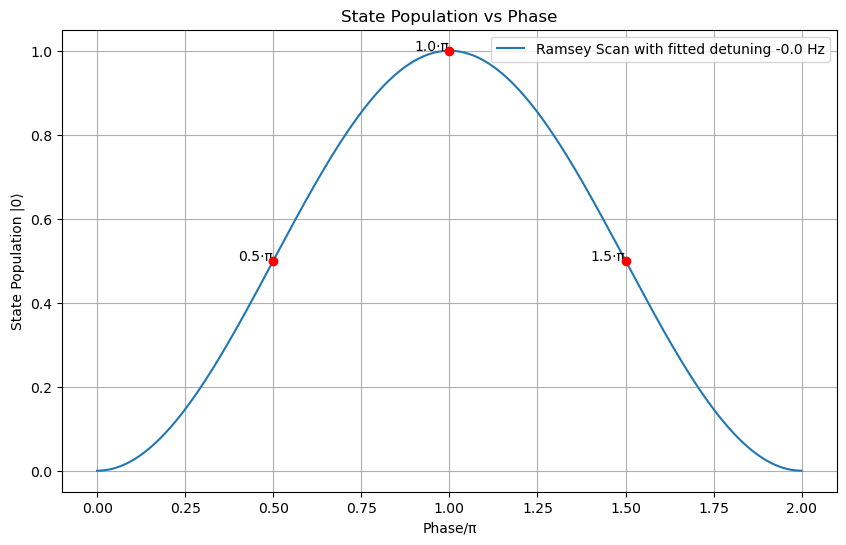

In [8]:
import numpy as np
from scipy.linalg import expm
from scipy.optimize import minimize
import matplotlib.pyplot as plt

def unitary_product_with_ket_zero(pi_time, T, delta, t_wait_T):
    omega = np.pi / (pi_time * 1e-6)
    t_pi_over_2 = (pi_time * 1e-6) / 2

    def U1(omega, t):
        H = np.array([[0, omega / 2],
                      [omega / 2, delta]], dtype=complex)
        U = expm(-1j * H * t)
        return U

    def U_wait(omega, t):
        H = np.array([[0, 0],
                      [0, delta]], dtype=complex)
        U = expm(-1j * H * t)
        return U

    def U2(omega, t):
        H = np.array([[0, omega * np.exp(-1j * np.pi * t_wait_T) / 2],
                      [omega * np.exp(1j * np.pi * t_wait_T) / 2, delta]], dtype=complex)
        U = expm(-1j * H * t)
        return U

    U1_mat = U1(omega, t_pi_over_2)
    U_wait_mat = U_wait(omega, T)
    U2_mat = U2(omega, t_pi_over_2)

    product = U2_mat @ U_wait_mat @ U1_mat

    ket_zero = np.array([1, 0], dtype=complex)
    result = product @ ket_zero
    state_pop = np.abs(result) ** 2
    return state_pop[0]

def fitting_function(delta, pi_time, T, phase_list, target_results):
    delta_val = delta[0]
    computed = np.array([unitary_product_with_ket_zero(pi_time, T, delta_val, t_wait_T)
                         for t_wait_T in phase_list])
    target = np.array(target_results)
    error = np.sum((computed - target) ** 2)
    return error

pi_time = 40
T = 100e-6
initial_delta_guess = [100 * 2 * np.pi]

phase_list = np.array([0.5, 1.0, 1.5])  # Phase/π values
target_results = np.array([0.5, 1, 0.5])  # Example data

result = minimize(fitting_function,
                  initial_delta_guess,
                  args=(pi_time, T, phase_list, target_results),
                  method='Nelder-Mead')

optimized_delta = result.x[0]
print(optimized_delta)
print("Optimized delta value (Hz):")
print(optimized_delta / (2 * np.pi))

t_wait_T_values = np.linspace(0, 2, 500)
state_populations = [unitary_product_with_ket_zero(pi_time, T, optimized_delta, t_wait_T)
                     for t_wait_T in t_wait_T_values]

plt.figure(figsize=(10, 6))
plt.plot(t_wait_T_values, state_populations,
         label=f'Ramsey Scan with fitted detuning {np.round(optimized_delta / (2 * np.pi), 2)} Hz')

plt.scatter(phase_list, target_results, zorder=5, marker='o', color='red')
for x, y in zip(phase_list, target_results):
    plt.text(x, y, f'{x}·π', fontsize=10, ha='right')

plt.xlabel('Phase/π')
plt.ylabel('State Population |0⟩')
plt.title('State Population vs Phase')
plt.legend()
plt.grid(True)
plt.savefig('example_fast_calibration_multi.png', dpi=300)
plt.show()
